In [ ]:
import matplotlib as mpl

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2023-03-16 08:16:34--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-03-16 08:16:34--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.003s  

2023-03-16 08:16:35 (37.1 MB/s) - ‘t

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def find_mean(some_list):

  # ฟังก์ชันหาค่าเฉลี่ย
  mean_list = sum(some_list)/len(some_list)
  return (mean_list)

def check_weigth(weigth):

  '''
  เช็คน้ำหนักของผ้า แล้วคืนค่าจำนวนรอบที่ต้องใช้ในการซัก
  โดยถ้าน้ำหนักของผ้าเกิน 6 กก. จะแบ่ง 2 รอบ
  แต่ถ้าน้ำหนักไม่เกินก็จะคิดเพียงรอบเดียว
  '''
  if(weigth > 6.00):
    count_round = 2
  else:
    count_round = 1
  return (count_round)

def calculate_income(sum_round):

  ''' หารายได้ '''
  # นำจำนวนรอบมาคูณ 40 เพื่อหารายได้ที่จะได้รับ
  return (sum_round * 40)

def calculate_bill(elec_unit, water_unit):

  ''' คิดค่าใช้จ่ายของหน่วย (ค่าน้ำ/ค่าไฟ) '''
  #ค่าไฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟฟ
  #เรียกฟังก์ชันเพื่อบวกหน่วยไฟฟ้าจากเครื่องใช้อื่นที่ไม่ใช่เครื่องซักผ้า
  elec_unit += cal_elec_unit()[0]

  if(elec_unit <= 150):
    # 0-15 หน่วย
    if(elec_unit <= 15):
      cal_bill_elec = elec_unit * 2.3488
    #10หน่วยถัดไป หน่วยที่ 16-25
    elif(elec_unit <=25):
      cal_bill_elec = (15 * 2.3488) + ((elec_unit-15)*2.9882)
    #10หน่วยถัดไป หน่วยที่ 26-35
    elif(elec_unit <= 35):
      cal_bill_elec = (15 * 2.3488) + (10*2.9882) + ((elec_unit-25)*3.2405)
    #65หน่วยถัดไป หน่วยที่ 36-100
    elif(elec_unit <=100):
       cal_bill_elec = (15 * 2.3488) + (10*2.9882) + (10*3.2405) + ((elec_unit-35)*3.6237)
    #50หน่วยถัดไป หน่วยที่ 101-150
    else:
      cal_bill_elec = (15 * 2.3488) + (10*2.9882) + (10*3.2405) + (65*3.6237) + ((elec_unit-100)*3.7171)

    #ค่าบริการรายเดือน กรณีใช้ไฟไม่เกิน 150 หน่วย
    cal_bill_elec += 8.19

  #เกิน 150หน่่วย
  else:
    # หน่วยที่ 0-400
    if(elec_unit <=400):
      cal_bill_elec = (150 * 3.2484) + ((elec_unit-150)*4.2218)
    #เกิน400หน่วยขึ้นไป
    else:
      cal_bill_elec = (150 * 3.2484) + (250*4.2218) + ((elec_unit-400)*4.4217)

    #ค่าบริการรายเดือน กรณีใช้ไฟเกิน 150 หน่วย
    cal_bill_elec += 24.62

  #ค่าFt * จำนวนหน่วยที่ใช้ทั้งหมด ค่าFt 0.9343 บาท ต่อหน่วย
  Ft = elec_unit * 0.9343

  #Vat 7% คิดจาก ค่าไฟ+ค่าบริการรายเดือน+ค่าFt
  Vat = (cal_bill_elec + Ft) * (7/100)

  #ค่าไฟทั้งหมด
  total_bill_elec = cal_bill_elec + Ft + Vat


  #ค่าน้ำาาาาาาาาาาาาาาาาาาาาาาาาาาาาาาาาาาา
  #ซักผ้า 1 ครั้ง ใช้น้ำ 100 ลิตร คิดเป็น 0.1 หน่วย ซัก 10 ครั้ง เท่ากับ 1 หน่วย
  #น้ำ 1 หน่วยซักได้ 10 ครั้ง
  if(water_unit <=10):
    cal_bill_water = water_unit * 10.20
  elif(water_unit <= 20):
     cal_bill_water = (10 * 10.20) + ((water_unit-10)*16.00)
  elif(water_unit <= 30):
     cal_bill_water = (10 * 10.20) + (10*16.00) + ((water_unit-10)*19.00)
  elif(water_unit <= 50):
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + ((water_unit-30)*21.20)
  elif(water_unit <= 80):
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + (20*21.20) + ((water_unit-50)*21.60)
  elif(water_unit <= 100):
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + (20*21.20) + (30*21.60) + ((water_unit-80)*21.65)
  elif(water_unit <= 300):
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + (20*21.20) + (30*21.60) + (20*21.65) + ((water_unit-100)*21.70)
  elif(water_unit <= 1000):
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + (20*21.20) + (30*21.60) + (20*21.65) + (200*21.70) + ((water_unit-700)*21.75)
  elif(water_unit <= 2000):
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + (20*21.20) + (30*21.60) + (20*21.65) + (200*21.70) + (700*21.75) + ((water_unit-1000)*21.80)
  elif(water_unit <= 3000):
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + (20*21.20) + (30*21.60) + (20*21.65) + (200*21.70) + (700*21.75) + (1000*21.80) + ((water_unit-1000)*21.85)
  else:
     cal_bill_water = (10 * 10.20) + (10*16.00) + (10*19.00) + (20*21.20) + (30*21.60) + (20*21.65) + (200*21.70) + (700*21.75) + (1000*21.80) + (1000*21.85) + ((water_unit-2000)*2190)

  bill = total_bill_elec + cal_bill_water
  return (bill)

def cal_elec_unit():

  '''
  คำนวนหน่วยไฟของแต่ละเครื่องใช้ไฟฟ้าแต่ละชนิด
  (กำลังไฟ(วัตต์) * จำนวน)/1000*จำนวนชั่วโมงที่ใช้ใน 1 วัน = จำนวนหน่วยต่อวัน
  จำนวนหน่วยต่อวัน เมื่อคิดต่อเดือน *30
  '''

  #พัดลม 52 w
  fan_unit = (52*3) /1000*12*30

  #หลอดไฟ 12 w
  light_unit = (12*8)/1000*12*30

  #CCTV 18.6 w
  cctv_unit = (18.6*1)/1000*24*30

  #เครื่องซักผ้า 2000 w
  #การซักผ้า 1 ครั้งใช้เวลา 40 นาที
  washing_machine_unit = (2000*1)/1000*(40/60)
  return (fan_unit + light_unit + cctv_unit,washing_machine_unit)

def data_per_month(low_user, high_user, low_weigth, high_weigth):

  total_income_month = 0 # รายได้รวมในเดือนนั้นๆ
  repair_cost = 6000 # ค่าซ่อมบำรุง 6000 บาท
  cost_per_month = 0 # ค่าใช้จ่ายต่อเดือนนั้นๆ
  elec_unit = 0 # หน่วยค่าไฟ
  water_unit = 0 # หน่วยค่าน้ำ
  #=======================================================#
  '''
  total_income_month : รายได้โดยรวมที่ทำได้ในเดือนนั้น
  repair_cost : ค่าซ่อมบำรุงต่อเดือน
  user : จำนวนผู้เข้าใช้บริการ สุ่มตั้งแต่ 30 ถึง 40 คน
  sum_round : นับจำนวนรอบที่ใช้เครื่องซักผ้าโดยรวม
  cloth_weigth : น้ำหนักของผ้า สุ่มตั้งแต่ 4 ถึง 7 กก.
  '''
  user_in_day = [] # ผู้เข้าใช้ต่อวัน
  total_round_month = 0 # จำนวนรอบที่ใช้เครื่องซักผ้ารวมต่อเดือน
  for day in range(30):
    # ลูปตามจำนวนวันในเดือนโดยเฉลี่ย (30 วัน)
    user = np.random.randint(low= low_user, high= high_user)
    user_in_day.append(user)
    sum_round = 0
    sum_round_day = 0
    for i in range(user):
      # ลูปตามจำนวนผู้เข้าใช้ในวันนั้น
      cloth_weigth = np.random.uniform(low= low_weigth, high= high_weigth)
      sum_round += check_weigth(cloth_weigth)

    # จำนวนครั้งที่ใช้ใน 1 วัน
    sum_round_day = sum_round
    # จำนวนครั้งที่ใช้ทั้งหมดใน1เดือน
    total_round_month += sum_round_day


  elec_unit += cal_elec_unit()[1] * ( total_round_month)
  # การซักผ้า 1 ครั้ง ใช้ไฟ 1.3334 หน่วยต่อครั้ง
  water_unit += 0.1 * ( total_round_month)
  # การซักผ้า 1 ครั้ง ใช้น้ำ 0.1 หน่วยต่อครั้ง
  income_per_month = calculate_income( total_round_month)
  total_income_month += income_per_month

  # รายได้ลบรายจ่ายต่อเดือน
  # ค่าน้ำ ค่าไฟ ต้องรวมหน่วยทั้งเดือนก่อนค่อยเอามาคิดรายจ่าย
  # จะได้เงินคงเหลือหลังหักค่าใช้จ่ายแต่ละเดือน
  expenses_per_month = (calculate_bill(elec_unit, water_unit) + 6000)
  total_income_month -= expenses_per_month

  return (total_income_month, income_per_month, expenses_per_month, total_round_month)

def payback_time(cost, low_user, high_user, low_weigth, high_weigth):

  # ฟังก์ชันหาระยะเวลาคืนทุน
  month_time_payback = 0 # คืนทุนต่อเดือน
  total_income = 0.0 # รายได้สุทธิรวม
  total_round = 0 # จำนวนรอบรวม
  total_month_income = 0 # รายได้โดยรวมต่อเดือน
  total_month_expenses = 0.0 # ค่าใช่จ่ายโดยรวมต่อเดือน
  #=======================================================#

  while (cost - total_income) > 0 :
    month_data = data_per_month(low_user, high_user, low_weigth, high_weigth)
    total_income += month_data[0]
    total_month_income += month_data[1]
    total_month_expenses += month_data[2]
    total_round += month_data[3]
    month_time_payback += 1
    '''
    month_time_payback จำนวนเดือนจนกว่าจะคืนทุน
    total_income รายได้หลังหักค่าใช้จ่ายของทุกเดือนจนกว่าจะคืนทุน
    total_month_income รายได้แบบไม่หักค่าใช้จ่าย
    total_month_expenses รายจ่ายรวมของทุกเดือน
    total_round จำนวนครั้งการใช้งานจนกว่าจะคืนทุน
    '''
  return (month_time_payback, total_income, total_month_income, total_month_expenses, total_round)

# เป็นส่วนข้อมูลที่เปลี่ยนแปลงได้เพื่อใช้ในการทดลอง
user = (30,40) # ข้อมูลจำนวนผู้เข้าใช้ต่ำสุดและสูงสุด
weigth = (3,7) # ข้อมูลน้ำหนักผ้าต่ำสุดและสูงสุด
cost = 1500000 # ต้นทุน
#=======================================================#

total_income_month, income_per_month, expenses_per_month, total_round_month = data_per_month(*user, *weigth)
month_time_payback, total_month_income, total_month_expenses, total_round, total_income = payback_time(cost, *user, *weigth)

In [ ]:
#ทดสอบการหาระยะเวลาคืนทุน
time = [] # ระยะเวลาที่ใช้
total_income = [] # รายได้สุทธิรวม
income_no_ex = [] # รายได้รวมที่ยังไม่หักค่าใช้จ่าย
expenses = [] # ค่าใช้จ่ายรวม
round = [] # จำนวนรอบที่เครื่องซักผ้าทำงานโดยรวม
#=======================================================#

for i in range(1000):
  test = payback_time(cost, *user, *weigth)
  time.append(test[0]) # เก็บระยะเวลาคืนทุน หลักเดือน
  total_income.append(test[1]) # ในระยะเวลาคืนทุนจะมีรายได้(ที่หักค่าใช้จ่าย)เท่าไร ค่าที่ได้จะใกล้เคียงกับ 1500000
  income_no_ex.append(test[2]) # ในระยะเวลาคืนทุน(ไม่หักค่าใช้จ่าย) จะได้รายได้เท่าไร (ค่าบริการ*จำนวนรอบ)
  expenses.append(test[3]) # ในระยะเวลาคืนทุนจะมีรายจ่าย(ค่าน้ำ ไฟ ซ่อมบำรุง ไม่รวมต้นทุนที่จ่ายไปก่อน1500000)เท่าไร
  round.append(test[4]) # จำนวนครั้งที่ใช้เครื่องซักผ้ากว่าจะคืนทุน


In [ ]:
plt.figure(figsize=(6,6))
plt.title("ระยะเวลาในการคืนทุน")
plt.xlabel("ระยะเวลา (เดือน)")
plt.ylabel("ความถี่ของระยะเวลาการคืนทุน (ครั้ง)")
plt.hist(time)

In [ ]:
plt.figure(figsize=(6,6))
plt.title("รายได้(หลังหักค่าใช้จ่าย)ในระยะเวลาคืนทุน")
plt.xlabel("การทดสอบ (ครั้งที่)",fontsize=15)
plt.ylabel("รายได้รวม (ล้านบาท)",fontsize=15)
plt.plot(total_income)

In [ ]:
plt.figure(figsize=(6,6))
plt.title("รายได้ในระยะเวลาคืนทุน")
plt.xlabel("การทดสอบ (ครั้งที่)",fontsize=15)
plt.ylabel("รายได้รวม (ล้านบาท)",fontsize=15)
plt.plot(income_no_ex)

In [ ]:
plt.figure(figsize=(6,6))
plt.title("รายจ่ายในระยะเวลาคืนทุน")
plt.xlabel("การทดสอบ (ครั้งที่)",fontsize=15)
plt.ylabel("รายจ่ายรวม (บาท)",fontsize=15)
plt.plot(expenses)

In [ ]:
plt.figure(figsize=(6,6))
plt.title("จำนวนครั้งการใช้งาน")
plt.xlabel("การทดสอบ (ครั้งที่)",fontsize=15)
plt.ylabel("จำนวนรอบการทำงาน (ครั้ง)",fontsize=15)
plt.plot(round)

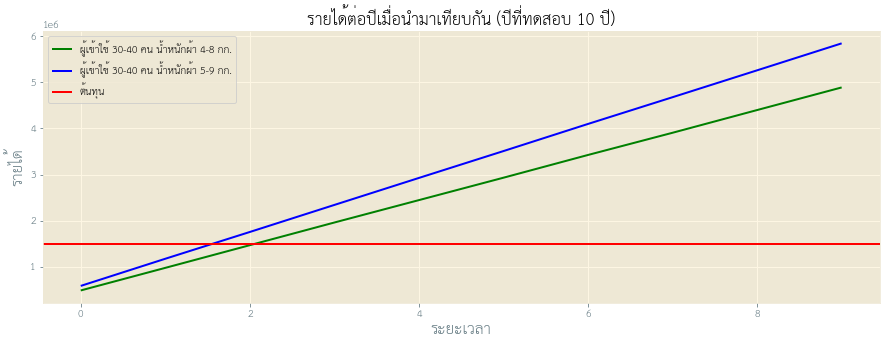


          ผู้เข้าใช้ 30-40 คน น้ำหนักผ้า 4-8 กก.  \
ปีที่ 1                                   489992   
ปีที่ 2                                   978927   
ปีที่ 3                                  1469977   
ปีที่ 4                                  1960845   
ปีที่ 5                                  2445735   
ปีที่ 6                                  2930716   
ปีที่ 7                                  3423123   
ปีที่ 8                                  3903725   
ปีที่ 9                                  4395408   
ปีที่ 10                                 4884979   

          ผู้เข้าใช้ 30-40 คน น้ำหนักผ้า 5-9 กก.  
ปีที่ 1                                   588438  
ปีที่ 2                                  1176121  
ปีที่ 3                                  1755956  
ปีที่ 4                                  2341437  
ปีที่ 5                                  2925829  
ปีที่ 6                                  3507323  
ปีที่ 7                                  4094764  
ปีที่ 8           

In [ ]:
# เป็นส่วนข้อมูลที่เปลี่ยนแปลงได้เพื่อใช้ในการทดลอง
test_year = 10 # ระยะปีที่ใช้ในการทดลอง
test_user1 = (30,40) # ข้อมูลจำนวนผู้เข้าใช้ต่ำสุดและสูงสุด ชุดที่ 1
test_user2 = (30,40) # ข้อมูลจำนวนผู้เข้าใช้ต่ำสุดและสูงสุด ชุดที่ 2
test_weigth1 = (4,8) # ข้อมูลน้ำหนักผ้าต่ำสุดและสูงสุดที่ใช้ในการทดลอง ชุดที่ 1
test_weigth2 = (5,9) # ข้อมูลน้ำหนักผ้าต่ำสุดและสูงสุดที่ใช้ในการทดลอง ชุดที่ 2
#=======================================================#

test_income1 = 0
test_income2 = 0
lst_test1 = [] # ลิสต์ที่ใช้เก็บข้อมูลรายได้ ที่ได้จากจำนวนผู้เข้าใช้ ชุดที่ 1
lst_test2 = [] # ลิสต์ที่ใช้เก็บข้อมูลรายได้ ที่ได้จากจำนวนผู้เข้าใช้ ชุดที่ 2
year_list = [] # ลิสต์ที่ใช้เก็บจำนวนปี
#=======================================================#

for year in range(1, test_year+1):
  count_year = f"ปีที่ {year}"
  year_list.append(count_year)
  for month in range(12):
    test_income1 += int(data_per_month(*test_user1, *test_weigth1)[0])
    test_income2 += int(data_per_month(*test_user2, *test_weigth2)[0])
  lst_test1.append(test_income1)
  lst_test2.append(test_income2)

plt.figure(figsize=(15,5))
plt.style.use('Solarize_Light2')
plt.plot(lst_test1, 'green', label=f"ผู้เข้าใช้ {test_user1[0]}-{test_user1[1]} คน น้ำหนักผ้า {test_weigth1[0]}-{test_weigth1[1]} กก.")
plt.plot(lst_test2, 'blue', label=f"ผู้เข้าใช้ {test_user2[0]}-{test_user2[1]} คน น้ำหนักผ้า {test_weigth2[0]}-{test_weigth2[1]} กก.")
plt.axhline(y=cost, color='red', label="ต้นทุน", linestyle='-')
plt.title(f'รายได้ต่อปีเมื่อนำมาเทียบกัน (ปีที่ทดสอบ {test_year} ปี)')
plt.xlabel('ระยะเวลา', fontsize=15)
plt.ylabel('รายได้', fontsize=15)
plt.legend()
plt.show()

print("")
data = {f"ผู้เข้าใช้ {test_user1[0]}-{test_user1[1]} คน น้ำหนักผ้า {test_weigth1[0]}-{test_weigth1[1]} กก.":lst_test1,
        f"ผู้เข้าใช้ {test_user2[0]}-{test_user2[1]} คน น้ำหนักผ้า {test_weigth2[0]}-{test_weigth2[1]} กก.":lst_test2}
data_frame = pd.DataFrame(data,  index=year_list)
print(data_frame)
print("")
print(f"ระยะเวลาในการทดลอง {test_year} ปี")
print(f"จำนวนผู้เข้าใช้ {test_user1[0]}-{test_user1[1]} คน รายได้สุทธิอยู่ที่ {test_income1} บาท")
print(f"จำนวนผู้เช้าใช้ {test_user2[0]}-{test_user2[1]} คน รายได้สุทธิอยู่ที่ {test_income2} บาท")

year_index1 = 0
year_index2 = 0
for index in range(len(year_list)):
  if(lst_test1[index] > cost):
    if(year_index1 == 0):
      year_index1 = index + 1
  if(lst_test2[index] > cost):
    if(year_index2 == 0):
      year_index2 = index + 1

print("")
print(f"ผู้เช้าใช้จำนวน {test_user1[0]}-{test_user1[1]} คน โดยมีน้ำหนักผ้าอยู่ที่ {test_weigth1[0]}-{test_weigth1[1]} กก. จะเริ่มคืนทุนในปีที่ {year_index1}\nโดยเริ่มได้กำไร = {lst_test1[year_index1-1]-cost} บาท")
print(f"ผู้เช้าใช้จำนวน {test_user2[0]}-{test_user2[1]} คน โดยมีน้ำหนักผ้าอยู่ที่ {test_weigth2[0]}-{test_weigth2[1]} กก. จะเริ่มคืนทุนในปีที่ {year_index2}\nโดยเริ่มได้กำไร = {lst_test2[year_index2-1]-cost} บาท")

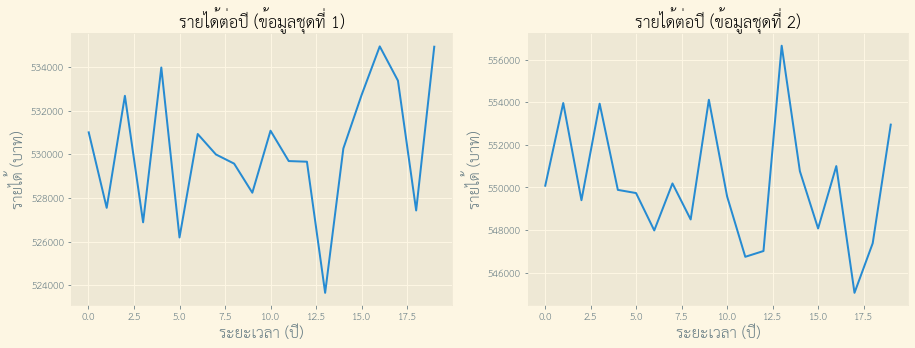


- กราฟทางซ้ายมีจำนวนผู้เข้าใช้ 40-50 คน และน้ำหนักผ้า 3-7 กก.
โดยจะมีรายได้ประมาณ 523652 ถึง 534974 บาท หรือเฉลี่ยออกมาประมาณ 530241.35 บาท

- กราฟทางขวามีจำนวนผู้เข้าใช้ 30-40 คน และน้ำหนักผ้า 5-8 กก.
โดยจะมีรายได้ประมาณ 545057 ถึง 556650 บาท หรือเฉลี่ยออกมาประมาณ 550150.95 บาท



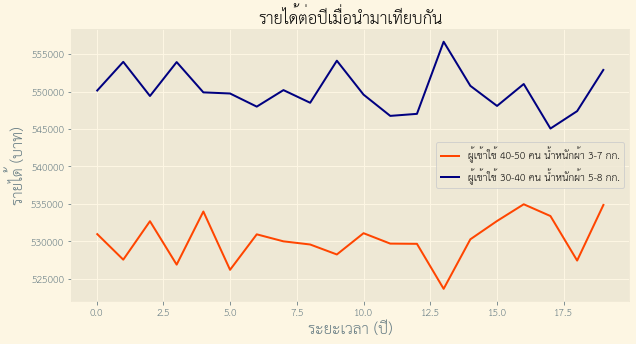


โดยเมื่อมีจำนวนผู้เข้าใช้ 40 ถึง 50 มีน้ำหนักผ้าประมาณ 3 ถึง 7 กก.ในระยะเวลาการทดลอง 20 ปี รายได้ที่ได้รับจะอยู่ที่ประมาณ 530241.35 บาท
โดยเมื่อมีจำนวนผู้เข้าใช้ 30 ถึง 40 มีน้ำหนักผ้าประมาณ 5 ถึง 8 กก.ในระยะเวลาการทดลอง 20 ปี รายได้ที่ได้รับจะอยู่ที่ประมาณ 550150.95 บาท


In [ ]:
# เคลียร์ลิสต์ lst_test เพื่อนำมาใช้ใหม่
lst_test1.clear()
lst_test2.clear()

for year in range(test_year):
  test_income1 = 0
  test_income2 = 0
  for month in range(12):
    test_income1 += int(data_per_month(*test_user1, *test_weigth1)[0])
    test_income2 += int(data_per_month(*test_user2, *test_weigth2)[0])
  lst_test1.append(test_income1)
  lst_test2.append(test_income2)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(lst_test1)
plt.title(f"รายได้ต่อปี (ข้อมูลชุดที่ 1)")
plt.xlabel("ระยะเวลา (ปี)", fontsize=15)
plt.ylabel("รายได้ (บาท)", fontsize=15)

plt.subplot(1,2,2)
plt.plot(lst_test2)
plt.title(f"รายได้ต่อปี (ข้อมูลชุดที่ 2)")
plt.xlabel("ระยะเวลา (ปี)", fontsize=15)
plt.ylabel("รายได้ (บาท)", fontsize=15)

plt.show()

print(f"\n- กราฟทางซ้ายมีจำนวนผู้เข้าใช้ {test_user1[0]}-{test_user1[1]} คน และน้ำหนักผ้า {test_weigth1[0]}-{test_weigth1[1]} กก.")
print(f"โดยจะมีรายได้ประมาณ {min(lst_test1)} ถึง {max(lst_test1)} บาท หรือเฉลี่ยออกมาประมาณ {find_mean(lst_test1)} บาท\n")
print(f"- กราฟทางขวามีจำนวนผู้เข้าใช้ {test_user2[0]}-{test_user2[1]} คน และน้ำหนักผ้า {test_weigth2[0]}-{test_weigth2[1]} กก.")
print(f"โดยจะมีรายได้ประมาณ {min(lst_test2)} ถึง {max(lst_test2)} บาท หรือเฉลี่ยออกมาประมาณ {find_mean(lst_test2)} บาท\n")

plt.figure(figsize=(10,5))
plt.plot(lst_test1, 'orangered', label=f"ผู้เช้าใช้ {test_user1[0]}-{test_user1[1]} คน น้ำหนักผ้า {test_weigth1[0]}-{test_weigth1[1]} กก.")
plt.plot(lst_test2, 'navy', label=f"ผู้เช้าใช้ {test_user2[0]}-{test_user2[1]} คน น้ำหนักผ้า {test_weigth2[0]}-{test_weigth2[1]} กก.")
plt.title("รายได้ต่อปีเมื่อนำมาเทียบกัน")
plt.xlabel("ระยะเวลา (ปี)", fontsize=15)
plt.ylabel("รายได้ (บาท)", fontsize=15)
plt.legend()
plt.show()

print("")
print(f"โดยเมื่อมีจำนวนผู้เข้าใช้ {test_user1[0]} ถึง {test_user1[1]} มีน้ำหนักผ้าประมาณ {test_weigth1[0]} ถึง {test_weigth1[1]} กก.",end="")
print(f"ในระยะเวลาการทดลอง {test_year} ปี รายได้ที่ได้รับจะอยู่ที่ประมาณ {find_mean(lst_test1)} บาท")
print(f"โดยเมื่อมีจำนวนผู้เข้าใช้ {test_user2[0]} ถึง {test_user2[1]} มีน้ำหนักผ้าประมาณ {test_weigth2[0]} ถึง {test_weigth2[1]} กก.",end="")
print(f"ในระยะเวลาการทดลอง {test_year} ปี รายได้ที่ได้รับจะอยู่ที่ประมาณ {find_mean(lst_test2)} บาท")

โดยเมื่อมีผู้เข้าใช้ 15-20 คน และน้ำหนักผ้า 3-7 กก. แล้วจำนวนรอบจะมีค่าประมาณตั้งแต่ 7592 ถึง 7775 รอบซึ่งมีค่าเฉลี่ยอยู่ที่ประมาณ 7662 รอบ
โดยเมื่อมีผู้เข้าใช้ 30-40 คน และน้ำหนักผ้า 4-8 กก. แล้วจำนวนรอบจะมีค่าประมาณตั้งแต่ 18494 ถึง 18791 รอบซึ่งมีค่าเฉลี่ยอยู่ที่ประมาณ 18640 รอบ


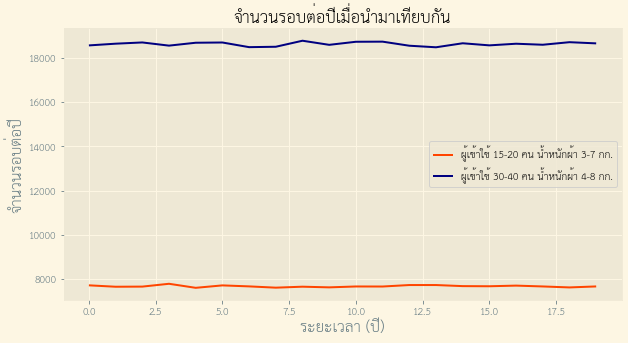

In [ ]:
# เคลียร์ลิสต์ lst_test เพื่อนำมาใช้ใหม่
lst_test1.clear()
lst_test2.clear()

test_round1 = 0 # ข้อมูลจำนวนรอบรวมทั้งหมด ชุดที่ 1
test_round2 = 0 # ข้อมูลจำนวนรอบรวมทั้งหมด ชุดที่ 2
lst_round1 = [] # ลิสต์เก็บจำนวนรอบต่อปี ชุดที่ 1
lst_round2 = [] # ลิสต์เก็บจำนวนรอบต่อปี ชุดที่ 2
#=======================================================#

for year in range(test_year):
  year_round1 = 0
  year_round2 = 0
  for month in range(12):
    year_round1 += data_per_month(*test_user1, *test_weigth1)[3]
    year_round2 += data_per_month(*test_user2, *test_weigth2)[3]
    test_round1 += year_round1
    test_round2 += year_round2
  lst_round1.append(year_round1)
  lst_round2.append(year_round2)
  lst_test1.append(test_round1)
  lst_test2.append(test_round2)

print(f"โดยเมื่อมีผู้เข้าใช้ {test_user1[0]}-{test_user1[1]} คน และน้ำหนักผ้า {test_weigth1[0]}-{test_weigth1[1]} กก. แล้วจำนวนรอบจะมีค่าประมาณตั้งแต่ {min(lst_round1)} ถึง {max(lst_round1)} รอบ",end="")
print(f"ซึ่งมีค่าเฉลี่ยอยู่ที่ประมาณ {int(find_mean(lst_round1))} รอบ")
print(f"โดยเมื่อมีผู้เข้าใช้ {test_user2[0]}-{test_user2[1]} คน และน้ำหนักผ้า {test_weigth2[0]}-{test_weigth2[1]} กก. แล้วจำนวนรอบจะมีค่าประมาณตั้งแต่ {min(lst_round2)} ถึง {max(lst_round2)} รอบ",end="")
print(f"ซึ่งมีค่าเฉลี่ยอยู่ที่ประมาณ {int(find_mean(lst_round2))} รอบ")

plt.figure(figsize=(10,5))
plt.plot(lst_round1, 'orangered', label=f"ผู้เช้าใช้ {test_user1[0]}-{test_user1[1]} คน น้ำหนักผ้า {test_weigth1[0]}-{test_weigth1[1]} กก.")
plt.plot(lst_round2, 'navy', label=f"ผู้เช้าใช้ {test_user2[0]}-{test_user2[1]} คน น้ำหนักผ้า {test_weigth2[0]}-{test_weigth2[1]} กก.")
plt.title("จำนวนรอบต่อปีเมื่อนำมาเทียบกัน")
plt.xlabel("ระยะเวลา (ปี)", fontsize=15)
plt.ylabel("จำนวนรอบต่อปี", fontsize=15)
plt.legend()
plt.show()

